# Prosper Loan Data Exploratory Analysis
## by Vivian Wang




 



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Univariate Exploration">Univariate Exploration</a></li>
<li><a href="#Bivariate Exploration">Bivariate Exploration</a></li>
<li><a href="#Multivariate Exploration">Multivariate Exploration</a></li>
<li><a href="#Final Plots and Summary">Final Plots and Summary</a></li>

</ul>

<a id='intro'></a>
## Introduction

> Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. This is a website where individuals can either invest in personal loans or request to borrow money.

> This dataset contains 113937 loans with 81 variables on each loan, including loan listing details, borrower's creidt profile and lender's profile. 

> In this  work, it is of great interest to find out what variables influence a borrower's interest rate. As a company, Prosper need to serve both borrower and lender. What are characteristics of defaulted or charged off loans? Is there any area Prosper could work on to improve Prosper product?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loan_df=pd.read_csv('prosperLoanData.csv')

In [3]:
pd.set_option('display.max_columns', 100)
loan_df.head()
# things to ignaore : listing key, investors, recommendation
# lender yield, is it related? 
# target to care loan status vs creditgrad, recommendation, memberkey, amountdeliquent, bankcard utilizatin, current creditlines, DelinquenciesLast7Years, income, EmploymentStatus,RevolvingCreditBalance
# group profile
# other parameters to decide on borrownAPR 





,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
loan_df.shape

(113937, 81)

In [5]:
loan_df.rename(columns={'ProsperRating (Alpha)':'ProsperRating'}, inplace=True)

### What is the structure of your dataset?

> This dataset include 113937 rows of data with 81 columns describing features related with loan

### What is/are the main feature(s) of interest in your dataset?

> I expect to find out what numerical and categorical variables have impact on borrower's interet rate. I am also interested in learning characteristics of charged off/defaulted loans. 



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I expect borrower's credit rating will have a strong impact on interest rate. Besides this factor, some variables like loan amount, current deliquency, homeowner status, employment status will also play a role in final interest rate.

In [6]:

# since prior and post 2009 July credit rating was recorded in two columns of 'CreditGrade' and 'ProsperRating', to obtain
# a complete picture of credit impact in a loan, the data is merged to output in one column. 
loan_df['Credit']=loan_df['CreditGrade'].fillna('')+loan_df['ProsperRating'].fillna('')

In [7]:
loan_df['Credit'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
        131
Name: Credit, dtype: int64

In [8]:
# combine rating data before and after 2009 in two different columns
# filter out loan_df without credit rating data 
loan_df_copy=loan_df[(loan_df['CreditGrade'].notnull())|(loan_df['ProsperRating'].notnull())]

In [9]:

loan_df_copy.shape[0]

113806

In [10]:
# convert list categories from numeric value into text
map_dict={0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3 : 'Business', 4: 'Personal Loan', 5: 'Student Use'
          , 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 
          13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',
          20: 'Wedding Loans'}

In [11]:
loan_df_copy['ListingCategory (numeric)']=loan_df_copy['ListingCategory (numeric)'].apply(map_dict.get)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
loan_df_copy['ListingCategory (numeric)'].value_counts()

Debt Consolidation    58242
Not Available         16965
Other                 10470
Home Improvement       7422
Business               7172
Auto                   2565
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             750
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [13]:
loan_df_copy.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
# set up order for ordinal_cat_var

from pandas.api.types import CategoricalDtype
ordinal_var_dict={'LoanStatus':['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','FinalPaymentInProgress','Cancelled'],
                 'Credit':['AA','A','B','C','D','E','HR','NC'],
                 'EmploymentStatus':['Employed','Full-time','Part-time','Self-employed', 'Not employed','Other','Retired','Not available'],
                 'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Not employed']}

for var in ordinal_var_dict:
    
    ordered_var=pd.api.types.CategoricalDtype(ordinal_var_dict[var], ordered=True)
    loan_df_copy[var]=loan_df_copy[var].astype(ordered_var)
    
    
#vclass=pd.api.types.CategoricalDtype(vsize, ordered=True)
    


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


<a id='Univariate Exploration'></a>
## Univariate Exploration
### Understand Prosper Product


### 1. What is loan amount distribution for Prosper Loans?

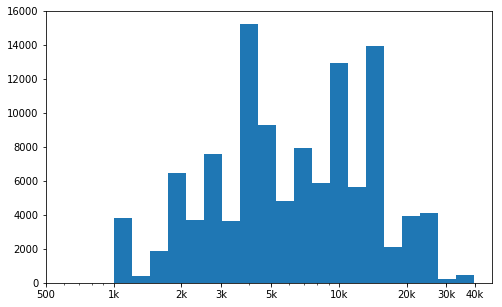

In [18]:
log_binsize = 0.08
plt.figure(figsize=[8,5])
bc=sns.color_palette()[0]
bins = 10 ** np.arange(np.log10(1000), (np.log10(35000)+log_binsize), log_binsize)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4,3e4, 4e4], [500, '1k', '2k','3k', '5k', '10k', '20k', '30k','40k'])
plt.hist(data=loan_df_copy, x='LoanOriginalAmount',bins=bins)
plt.xscale('log')
_=plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4,3e4, 4e4], [500, '1k', '2k','3k', '5k', '10k', '20k', '30k','40k'])

### At Prosper, the loan amount is between 1000 to 40000. For small amount of lower than 1000, people is not likely to use prosper loan. The most popular loan amount is around 4000.  There are very few case when loan amount is larger than 30000.

### 2. How long do borrowers take on these loans?

Text(0,0.5,'')

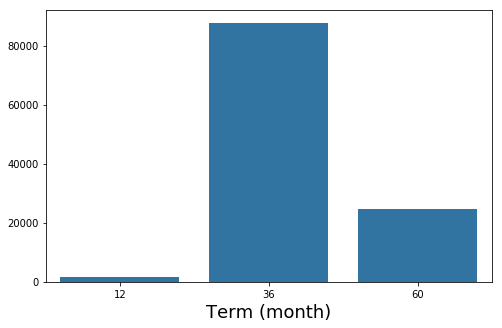

In [19]:
plt.figure(figsize=[8,5])
sns.countplot(data=loan_df_copy, x='Term', color=sns.color_palette()[0])
plt.xlabel('Term (month)', fontsize=18)
plt.ylabel('')

In [20]:
loan_df_copy['Term']=loan_df_copy['Term'].astype(str)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


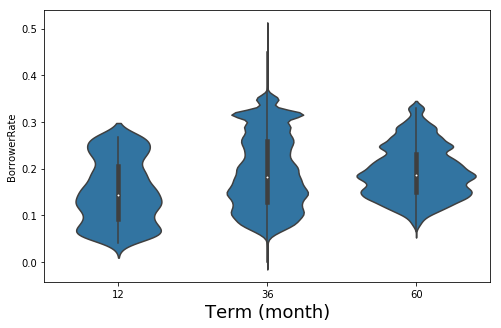

In [26]:
plt.figure(figsize=[8,5])
sns.violinplot(data=loan_df_copy, x='Term', y='BorrowerRate', color=bc)
_=plt.xlabel('Term (month)', fontsize=18)

### At prosper, 3 year loan term is most popular. This might be affected by combined interest rate and fee rate. One year might be too short to pay off loan while 5 year might have much higher interest rate. 

### 3. How much interest rate are borrowers paying?

In [27]:
loan_df_copy.BorrowerRate.describe()

count    113806.000000
mean          0.192798
std           0.074801
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

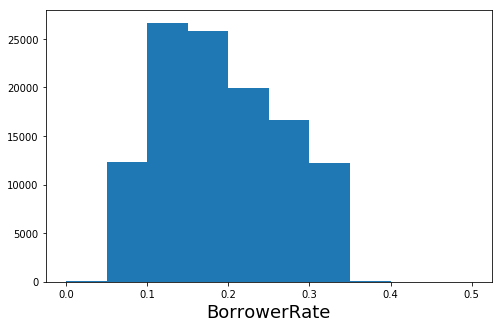

In [28]:
# Explore input Credit's distribution
# Explore output BorrowerRate's distribution
# try to identify any pattern in this dataset
plt.figure(figsize=[8,5])
binsize=np.arange(0,0.5+0.03, 0.05)
plt.hist(data=loan_df_copy, x='BorrowerRate',bins=binsize)
_=plt.xlabel('BorrowerRate', fontsize=18)

### From this plot, extremely low interest rate range 0-0.05% and high rate 0.35-0.5% are quite rare. The most typical rate is observed in the range of 0.1%-0.15%. 

### 4. How is borrowers' credit rating? Do they carry good or bad credit when apply for Prosper loans?


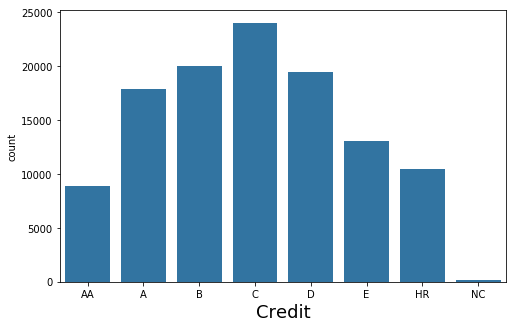

In [30]:
# Exploe the input variable Credit distribution
plt.figure(figsize=[8,5])
bc=sns.color_palette()[0]
sns.countplot(data=loan_df_copy, x='Credit',color=bc)
_=plt.xlabel ('Credit', fontsize=18)

### It seems applicant's credit rating is normally distributed. There are some applicants with top credit of AA or A. There are also applicants with bad grade below D. Overall, majority of applicants are with credit grade C.



###  5. How is Prosper loan doing? How many loans are loss or gain?


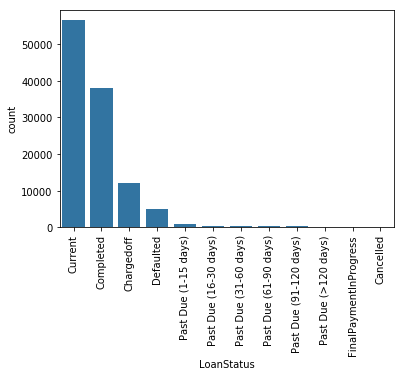

In [32]:
sns.countplot(data=loan_df_copy, x='LoanStatus',color=bc)
_=plt.xticks(rotation=90)

#### We could take a closer look by loan status percentage.

In [33]:
LoanStatus_Per=loan_df_copy.LoanStatus.value_counts(normalize=True).reset_index()

In [34]:


LoanStatus_Per.LoanStatus=LoanStatus_Per.LoanStatus*100

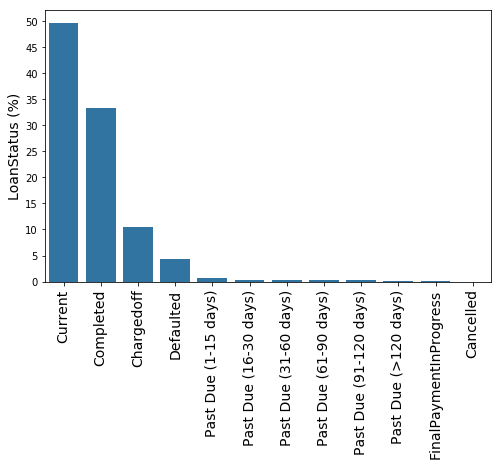

In [36]:
plt.figure(figsize=[8,5])
sns.barplot(x='index', y='LoanStatus', data=LoanStatus_Per,color=bc)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 50.5, 5))
plt.ylabel('LoanStatus (%)', fontsize=14)
_=plt.xlabel('')

### From LoanStatus percentage chart, it is learned that about 15% of loans are bad including both Charged off and defaulted loans while ~12% of loans with delinquency issue. 
### There are 49.7% of loans are current with 33% of loans are completed. 
### Overall, Prosper Loan business is doing good.  To be a successful business, we will use these to study how Prosper position its product to reduce bad loan percentage. 

### 6.  When people use Prosper loan most for?

In [37]:
loan_df_copy['ListingCategory'].value_counts(normalize=True)


Debt Consolidation    0.511766
Not Available         0.149069
Other                 0.091999
Home Improvement      0.065216
Business              0.063020
Auto                  0.022538
Personal Loan         0.021045
Household Expenses    0.017539
Medical/Dental        0.013374
Taxes                 0.007776
Large Purchases       0.007697
Wedding Loans         0.006775
Vacation              0.006748
Student Use           0.006590
Motorcycle            0.002671
Engagement Ring       0.001907
Baby&Adoption         0.001749
Cosmetic Procedure    0.000800
Boat                  0.000747
Green Loans           0.000518
RV                    0.000457
Name: ListingCategory, dtype: float64

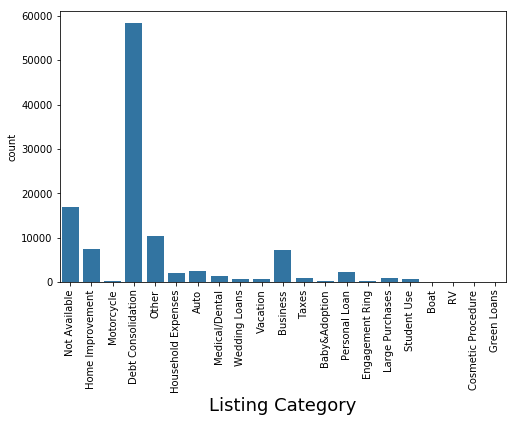

In [39]:
plt.figure(figsize=[8,5])
sns.countplot(data=loan_df_copy, x='ListingCategory', color=bc)
plt.xlabel('Listing Category', fontsize=18)
_=plt.xticks(rotation=90)

### At Prosper, the most popular loan type is for debt consolidation among 21 classified categories. It has close to 60000 cases accounting for 51% of total loans. There are also 18000 loans without specifying loan purpose. It is interesting to find out that people seek Prosper loan to debt consolidation

### 7. For Investors, what is general return from Prosper?

In [40]:
loan_df_copy.EstimatedEffectiveYield.describe()

count    84853.000000
mean         0.168661
std          0.068467
min         -0.182700
25%          0.115670
50%          0.161500
75%          0.224300
max          0.319900
Name: EstimatedEffectiveYield, dtype: float64

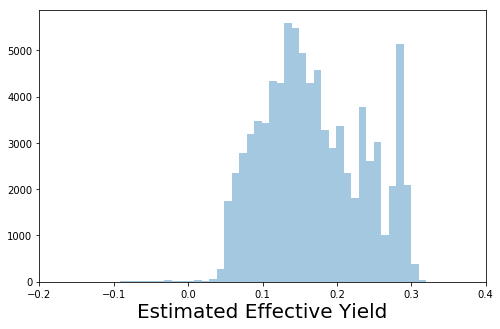

In [41]:
plt.figure(figsize=[8,5])
sns.distplot(loan_df_copy[loan_df_copy['EstimatedEffectiveYield'].notnull()].EstimatedEffectiveYield, kde=False)
plt.xlim(-0.2, 0.4)
_=plt.xlabel('Estimated Effective Yield', fontsize=20)

### Typical effect yield for investor is in 9-15% range.

In [42]:
def convert_loanstatus(x):
    if x.split('(')[0] == 'Past Due ':
        return 'Past Due'
    elif x in ['Chargedoff', 'Defaulted']:
        return 'Bad Loan'
    else:
        return x

In [43]:
loan_df_copy['Loan_Status_RC']=loan_df_copy.LoanStatus.apply(convert_loanstatus)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:

loan_df_copy['Loan_Status_RC'].value_counts()

Current                   56576
Completed                 37952
Bad Loan                  17001
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: Loan_Status_RC, dtype: int64

<a id='Bivariate Exploration'></a>
## Bivariate Exploration






### First question we would like to answer is what factors will impact borrowers' interest rate? This analysis will be performed on whole dataset with different loan status.

### Numeric variables of interest:


We would like to look into some numerical variables of interest and check if there is any correlations between them. 
<br>
- BorrowerRate
<br>
- LoanOriginalAmount
<br>
- Term
<br>
- RevolvingCreditBalance
<br>
- CurrentDelinquencies
<br>
- BankcardUtilization
<br>
- DebtToIncomeRatio

In [45]:
num_columns=['BorrowerRate', 'LoanOriginalAmount','DebtToIncomeRatio', 'RevolvingCreditBalance','CurrentDelinquencies','DelinquenciesLast7Years','BankcardUtilization']

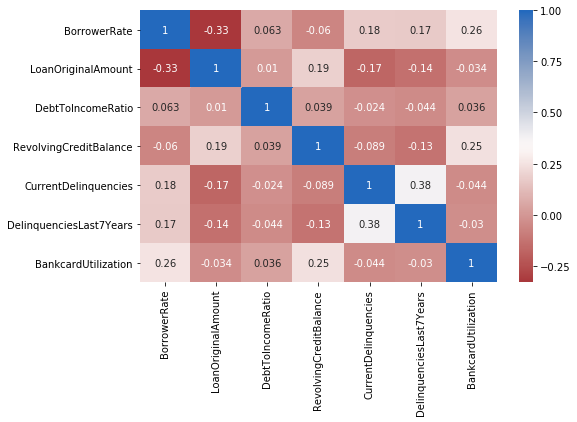

In [48]:

plt.figure(figsize = [8, 5])
_=sns.heatmap(loan_df_copy[num_columns].corr(), annot=True, cmap='vlag_r')

### From this correlation matrix:
1. LoanOriginal amount and BankcardUtilization has medium correlation with BorrowerRate, in which the loan amount has a negative correlation and utilization has a positive correlation.

2. Besides these two factors, deliquncies from current and from past several 7 year have positive correlation as well.

3. It is surprising to find DebtToIncomeRatio has very weak correlation with BorrowerRate. We will have a closer look on this matter. 

In [49]:
## debt to income ratio exploration

loan_df_copy.DebtToIncomeRatio.describe()

count    105263.000000
mean          0.275976
std           0.551811
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

(array([  4.47520000e+04,   4.72510000e+04,   1.07170000e+04,
          1.31500000e+03,   4.16000000e+02,   1.64000000e+02,
          6.80000000e+01,   4.70000000e+01,   2.70000000e+01,
          2.80000000e+01,   1.50000000e+01,   2.00000000e+01,
          1.30000000e+01,   1.40000000e+01,   8.00000000e+00,
          6.00000000e+00,   1.10000000e+01,   9.00000000e+00,
          9.00000000e+00,   6.00000000e+00,   8.00000000e+00,
          6.00000000e+00,   8.00000000e+00,   7.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   9.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

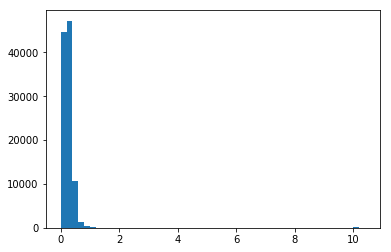

In [50]:
binsize=np.arange(0,10.5,0.2)
plt.hist(data=loan_df_copy[loan_df_copy.DebtToIncomeRatio.notnull()], x='DebtToIncomeRatio', bins=binsize)

### This DebtToIncomeRatio plot is extremely right skewed with some outliers around 10. The data should be transformed to give bettwer readability.

In [51]:
# perform cuberoot transformation on debettoincome ratio.


def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [52]:

loan_df_copy['cr_DebtToIncomeRatio']=loan_df_copy['DebtToIncomeRatio'].apply(cuberoot_trans)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


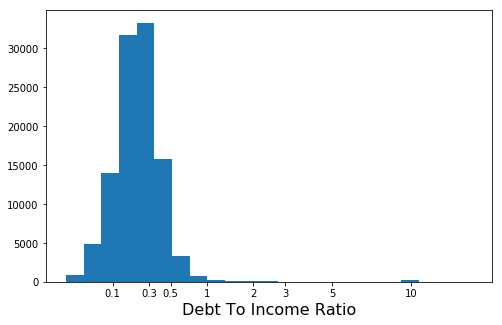

In [54]:
bins=np.arange(0.2,2.6,0.1)
plt.figure(figsize=[8,5])
plt.hist(data=loan_df_copy[loan_df_copy.DebtToIncomeRatio.notnull()], x='cr_DebtToIncomeRatio',bins=bins)
ratio_ticks = [0.1, 0.3, 0.5,  1,  2, 3,5,10]
plt.xticks(cuberoot_trans(np.array(ratio_ticks)), ratio_ticks)
_=plt. xlabel('Debt To Income Ratio', fontsize=16)

### The above plot indicates that most DebtToIncome ratio is below 1. Larger than 1 debt to income ratio is quite rare. There are only few cases when this ratio is at 10 or above. 

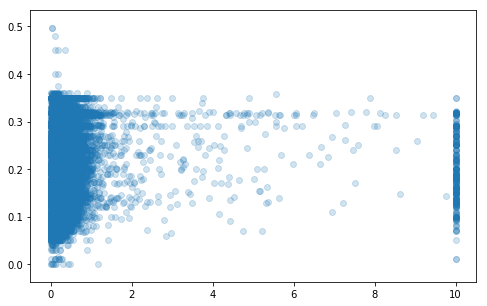

In [56]:
plt.figure(figsize=[8,5])
_=plt.scatter( x='DebtToIncomeRatio', y='BorrowerRate', data=loan_df_copy, alpha=1/5)



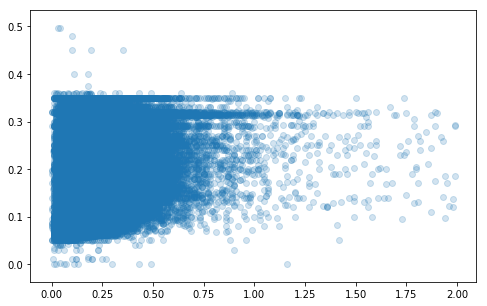

In [58]:
# consider the major loans with DebtToIncomeRatio below 2
plt.figure(figsize=[8,5])
_=plt.scatter( x='DebtToIncomeRatio', y='BorrowerRate', data=loan_df_copy[loan_df_copy.DebtToIncomeRatio <2], alpha=1/5)



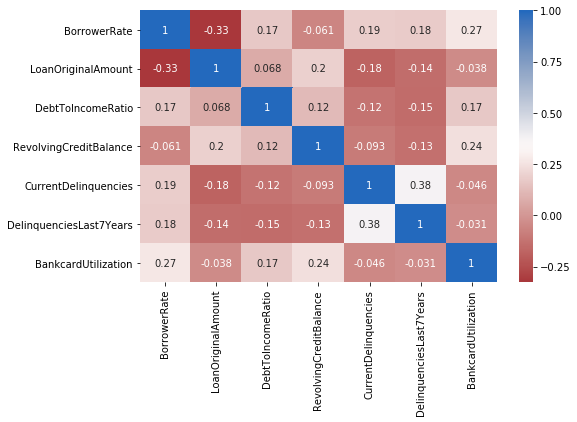

In [59]:

plt.figure(figsize = [8, 5])
_=sns.heatmap(loan_df_copy[loan_df_copy.DebtToIncomeRatio <2][num_columns].corr(), annot=True, cmap='vlag_r')

### The DebtToIncomeRatio data is quite right skewed, which makes it hard to see its correlation with BorrowerRate. If we filter out data to consider the majority of data below 2. We could see a greatly improved correlation from 0.06 to 0.17


In [60]:
num_columns1=['BorrowerRate', 'LoanOriginalAmount','cr_DebtToIncomeRatio', 'RevolvingCreditBalance','CurrentDelinquencies','DelinquenciesLast7Years','BankcardUtilization']

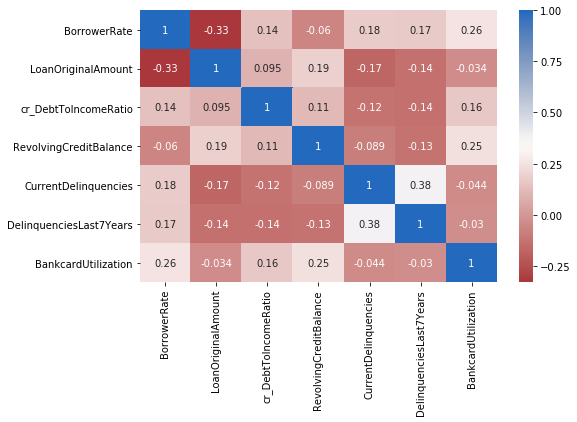

In [61]:
plt.figure(figsize = [8, 5])
_=sns.heatmap(loan_df_copy[num_columns1].corr(), annot=True, cmap='vlag_r')

### When we use the cuberoot converted DebtToIncomeRatio to compute correlatioin matrix, we see a similar trend of correlation improvement  between DebtToIncomeRatio and BorrowerRate to 0.14. 

### Let's look more into the OriginalLoanAmount and BorrowerRate

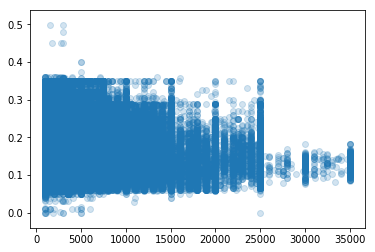

In [62]:

_=plt.scatter(data=loan_df_copy, x='LoanOriginalAmount',y='BorrowerRate', alpha =0.2)

###  This plot confirmed that higher loan amount tend to receive lower interest rate. This might be an incentive for borrower to loan more so that investor and Prosper could have higher profit when loan is completed.

In [63]:
loan_df_copy.BankcardUtilization.describe()

count    106202.000000
mean          0.561443
std           0.317912
min           0.000000
25%           0.310000
50%           0.600000
75%           0.840000
max           5.950000
Name: BankcardUtilization, dtype: float64

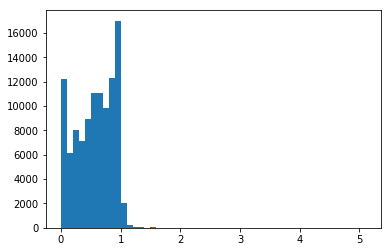

In [64]:
plt.hist(data=loan_df_copy[loan_df_copy.BankcardUtilization.notnull()], x='BankcardUtilization', bins=np.arange(0, 5.2, 0.1));

### BankcardUtilization indicate how much available credit has been used for the profile. This number should not exceed 1.  Further analysis could be performed by filtering out data larger than 1. 

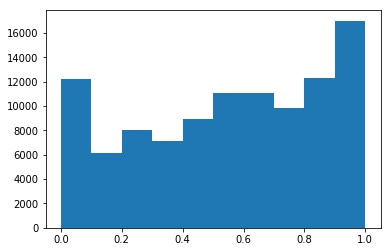

In [65]:
plt.hist(data=loan_df_copy[loan_df_copy.BankcardUtilization<1], x='BankcardUtilization', bins=np.arange(0, 1.1, 0.1));

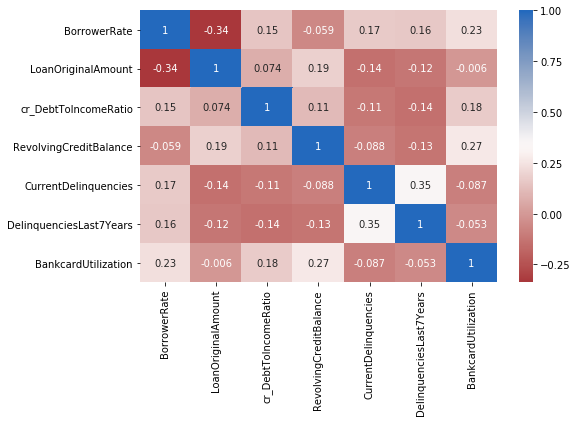

In [66]:
plt.figure(figsize = [8, 5])
sns.heatmap(loan_df_copy[loan_df_copy.BankcardUtilization<1][num_columns1].corr(), annot=True, cmap='vlag_r');



### By using only BankcardUtilization data <1, a better correlation between this value with BorrowerRate is observed.

### How is current deliquencies' impact on loan interest rate?

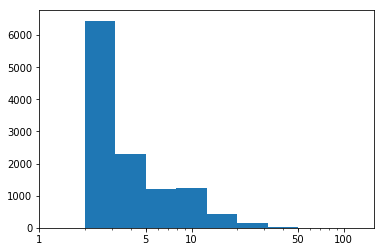

In [67]:
bins=10**np.arange(0.1,np.log10(83)+0.2,0.2)
plt.hist(data=loan_df_copy[loan_df_copy.CurrentDelinquencies.notnull()], x='CurrentDelinquencies',bins=bins)
plt.xscale('log')
plt.xticks([1,5,10,50,100],[1,5,10,50,100]);

### Current delinequncies data is also quite right skewed. 

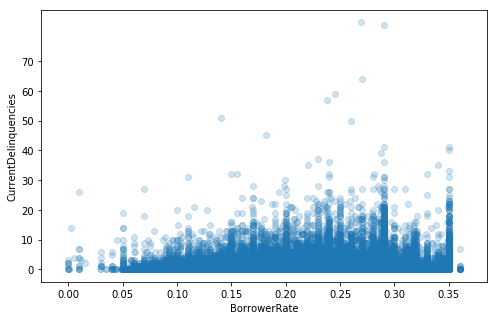

In [70]:
plt.figure(figsize=[8,5])
plt.scatter(data=loan_df_copy, y='CurrentDelinquencies',x='BorrowerRate', alpha =0.2)
plt.xlabel('BorrowerRate')
plt.ylabel('CurrentDelinquencies')
plt.yticks(np.arange(0,80,10));

### Most customers' CurrentDelinquencies is smaller than 10. Once this number rise above 10, it starts to affect borrower rate much more. 

In [71]:
# Convert current delinquencies value by cuberoot_trans
loan_df_copy['cr_CurrentDelinquencies']=loan_df_copy.CurrentDelinquencies.apply(cuberoot_trans);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


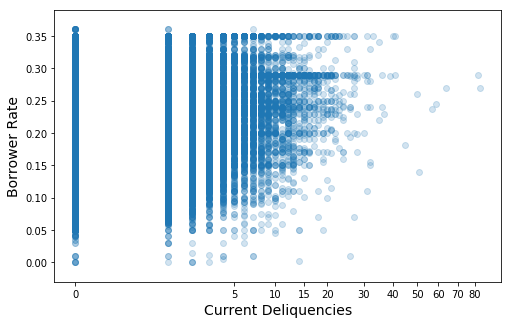

In [73]:
plt.figure(figsize=[8,5])
plt.scatter(data=loan_df_copy, x='cr_CurrentDelinquencies',y='BorrowerRate', alpha =0.2)
deliquency_ticks=[0,5,10,15,20,30,40,50,60,70,80]
plt.xticks(cuberoot_trans(np.array(deliquency_ticks)), deliquency_ticks)
plt.xlabel('Current Deliquencies', fontsize=14)
plt.ylabel('Borrower Rate', fontsize=14);

### When Current Deliquencies is larger than 10, it is more likely to get higher interest rate for Prosper loan.

## II. Look more into categorical variables' impact on BorrowerRate

In [74]:
cat_columns=['Credit','EmploymentStatus','IsBorrowerHomeowner','IncomeRange']

### 1. Credit impact on Borrower Interest Rate

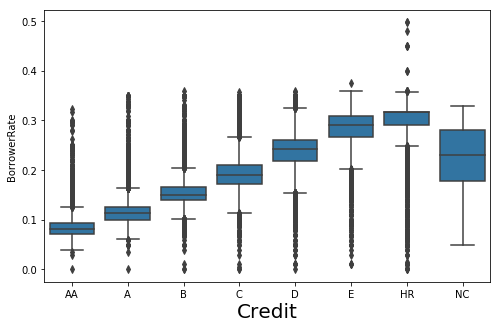

In [76]:
plt.figure(figsize=[8,5])
sns.boxplot(data=loan_df_copy, x='Credit', y='BorrowerRate', color=bc)
plt.xlabel('Credit', fontsize=20);

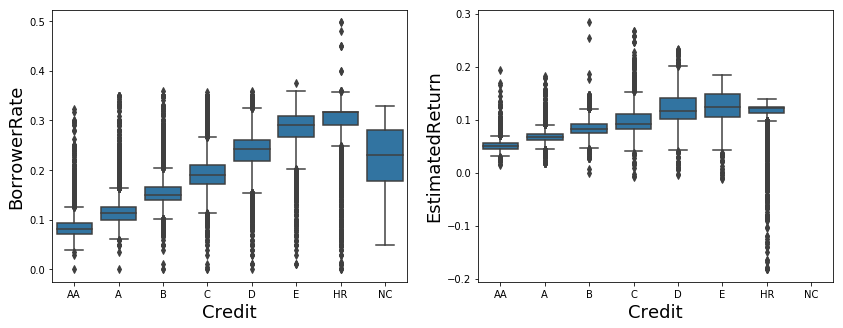

In [82]:


fig, ax = plt.subplots(ncols = 2, figsize = [14,5])

num_var=['BorrowerRate','EstimatedReturn']
for i in range(2):
    var=num_var[i]
   
    sns.boxplot(data=loan_df_copy, x='Credit', y=var, ax=ax[i], color=bc)
    ax[i].set_xlabel('Credit',fontsize=18)
    ax[i].set_ylabel(var, fontsize=18);


### Based on Prosper rating, the higher credit rating, the better interest rate for borrower. 
### In contrast, the higher credit rating means lower estimated return for investor. 

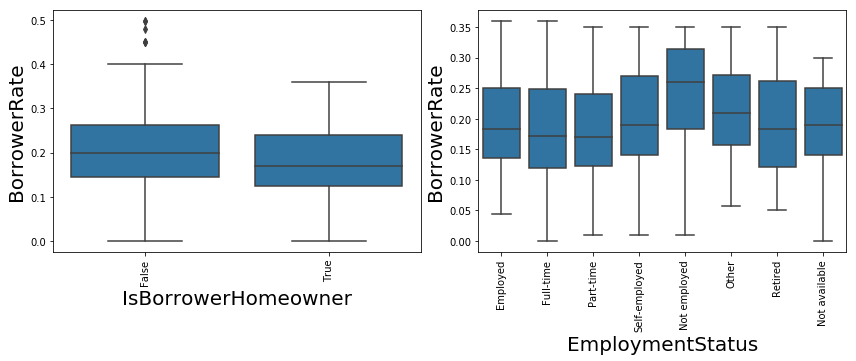

In [83]:
fig, ax=plt.subplots(ncols=2, figsize=[12,5])

cat_columns_1=['IsBorrowerHomeowner','EmploymentStatus']

for i in range(2):
    var=cat_columns_1[i]
    sns.boxplot(data=loan_df_copy, x=var, y='BorrowerRate', ax=ax[i],color=bc)
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[i].set_xlabel(var,fontsize=20)
    ax[i].set_ylabel('BorrowerRate',fontsize=20)
    plt.setp(ax[i].get_xticklabels(), rotation=90)

### People who are not empolyed or not owning home are likely to get higher interest rate. The way how this data classify 'employed' , 'full-time' and 'part-time' is not clear.  However,  the 'non-employed' people stands out and receive much higher interest rate than employed peoplel whether full time, part time or self employed.

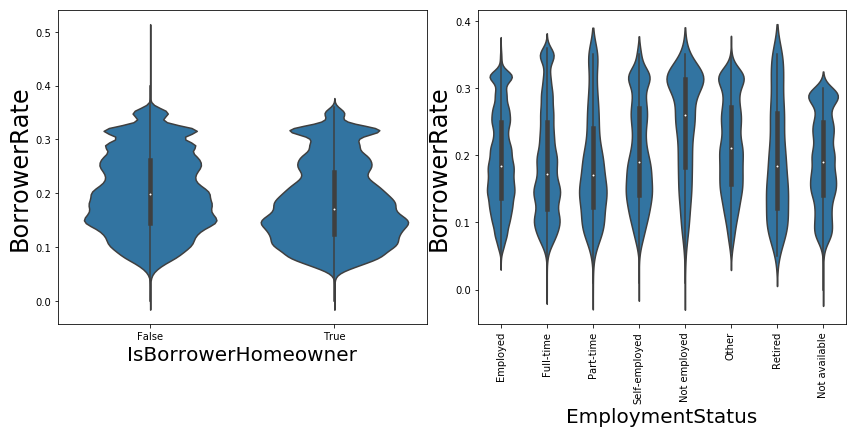

In [84]:
fig, ax=plt.subplots(ncols=2, figsize=[12,6])

for i in range(2):
    var=cat_columns_1[i]
    sns.violinplot(data=loan_df_copy, x=var, y='BorrowerRate', ax=ax[i],color=bc)
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[i].set_xlabel(var,fontsize=20)
    ax[i].set_ylabel('BorrowerRate',fontsize=24)
    
   
   

### With violin plot, the distribution is more obvious for the trend described: 
1. Homeowner gets lower interest rate 
2. Not employed applicant tend to receive much higher interest rate obiviouly. 

### So far, we have identified cat variables like credit rating,  homeowner, employment status will impact on borrower rate.

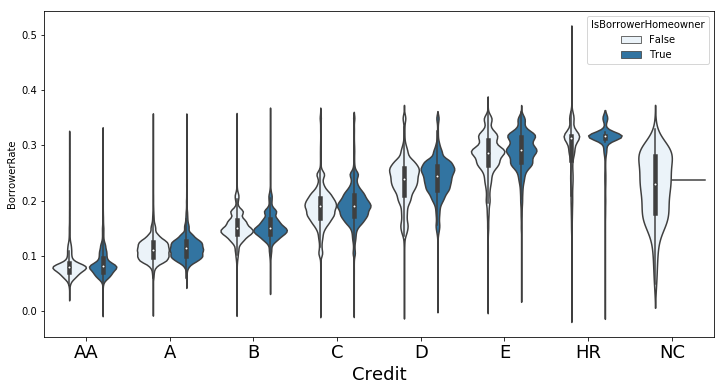

In [86]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loan_df_copy, x='Credit', y='BorrowerRate', hue='IsBorrowerHomeowner', color=bc)
plt.xticks(fontsize=18)
plt.xlabel('Credit',fontsize=18);

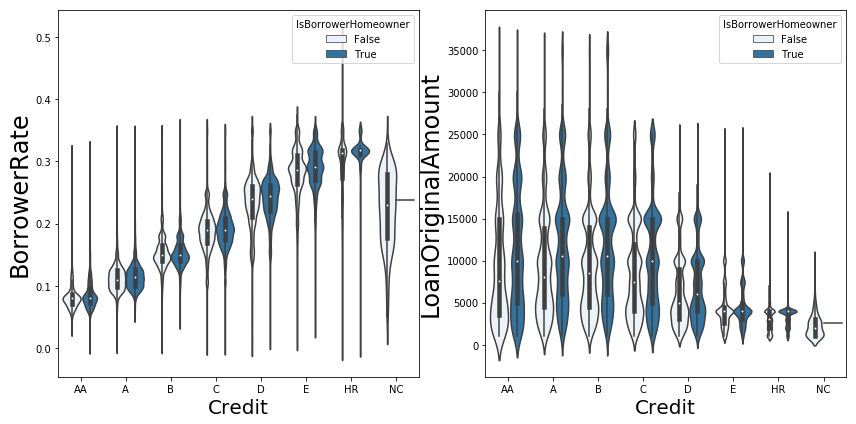

In [87]:
fig, ax=plt.subplots(ncols=2, figsize=[12,6])
columns2=['BorrowerRate','LoanOriginalAmount']
for i in range(2):
    var=columns2[i]
    sns.violinplot(data=loan_df_copy, x='Credit', y=var, hue='IsBorrowerHomeowner',ax=ax[i],color=bc)
    
    plt.tight_layout()
    ax[i].set_xlabel('Credit',fontsize=20)
    ax[i].set_ylabel(var,fontsize=24);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From bivariate analysis, we have learned the Credit rating has a positive correlation with BorrowerRate. Besides this most important factor, the loan amount, debt profile ( DebtToIncomeRation, BnakUtilization) and habit to pay off (current delinquency, and delinquencies from past 7 years) have medium impact on borrower interest rate. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When applicant have higher credit rating than C , better grade, more homeowners tend to receive better interest rate. Once their credit rating is worse than C, more homeowners are likely getting higher interest rate.

> Once their rating is lower than C, being a homeowner does not differentiate their loan amount. It is also interesting to note their loan amount is quite small than 5000 for bad rating applicant. 

<a id='Multivariate Exploration'></a>
## Multivariate Exploration

### Characteristics of Bad Loans

In [88]:
# In this sectioin, data is sliced to focus on bad loan (charged off and defaulted loans) vs good loan (completed loans) 
loan_df_status=loan_df_copy[loan_df_copy['Loan_Status_RC'].isin(['Completed','Bad Loan'])]

In [89]:
loan_df_status.Loan_Status_RC.value_counts()
# i would like to understand some bad loan characteristics vis separating data bad or completed loan 

Completed    37952
Bad Loan     17001
Name: Loan_Status_RC, dtype: int64

### 1. Loan Term Impact

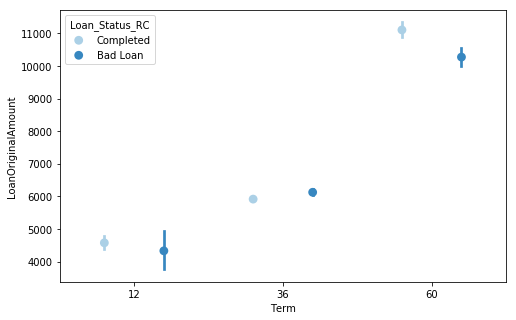

In [91]:
plt.figure(figsize=[8,5])
sns.pointplot(data=loan_df_status,x="Term", y="LoanOriginalAmount", hue='Loan_Status_RC', palette = 'Blues', linestyles = '', dodge = 0.4);

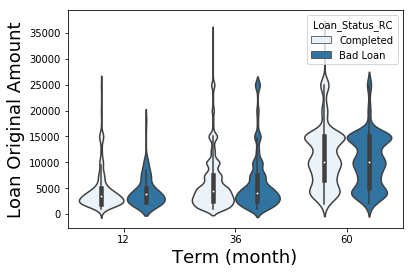

In [93]:
sns.violinplot(data=loan_df_status,x="Term", y="LoanOriginalAmount", hue='Loan_Status_RC', color=bc)
plt.xlabel('Term (month)', fontsize=18)
plt.ylabel('Loan Original Amount', fontsize=18);

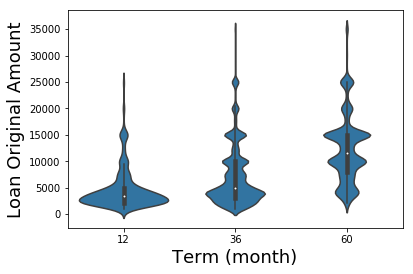

In [95]:
sns.violinplot(data=loan_df_copy, x='Term', y='LoanOriginalAmount', color=bc)
plt.xlabel('Term (month)', fontsize=18)
plt.ylabel('Loan Original Amount', fontsize=18);

###  For larger loan amount, people are likely to pay it off with longer term. However, there is no specific pattern observed for good /bad loan vs different term, loan amount.

### 2. Income Range Impact

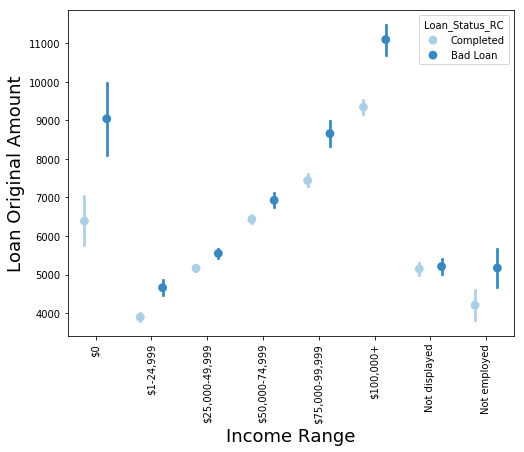

In [97]:
plt.figure(figsize=[8,6])
sns.pointplot(data=loan_df_status, x='IncomeRange', y='LoanOriginalAmount',hue='Loan_Status_RC',palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation=90)
plt.xlabel('Income Range', fontsize=18)
plt.ylabel('Loan Original Amount', fontsize=18);

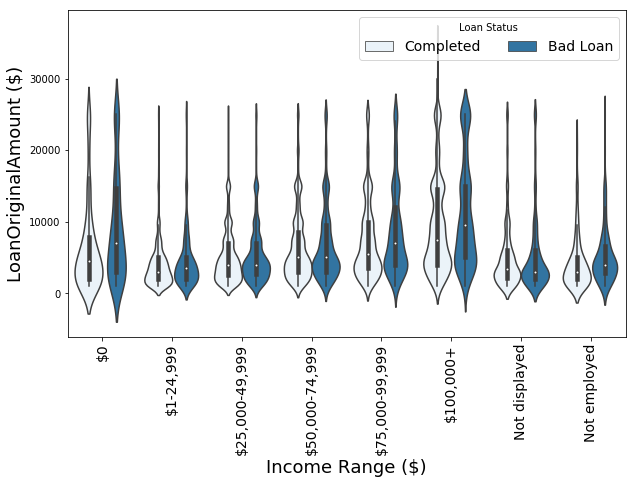

In [99]:
plt.figure(figsize=[10,6])
sns.violinplot(data=loan_df_status, x='IncomeRange', y='LoanOriginalAmount',hue='Loan_Status_RC',color=bc)
plt.xticks(rotation=90,fontsize=14)
plt.legend(title='Loan Status', fontsize=14, ncol=2)
plt.xlabel('Income Range ($)', fontsize=18)
plt.ylabel('LoanOriginalAmount ($)', fontsize=18);


### Higher income people is likely to apply for higher loan amount. There are more applicants likely to be bad loan with high income and large loan amount.

### 3. Loan Category Impact

In [100]:
loan_cat=loan_df_status.groupby('ListingCategory')['Loan_Status_RC'].value_counts(normalize=True).reset_index(level='ListingCategory')

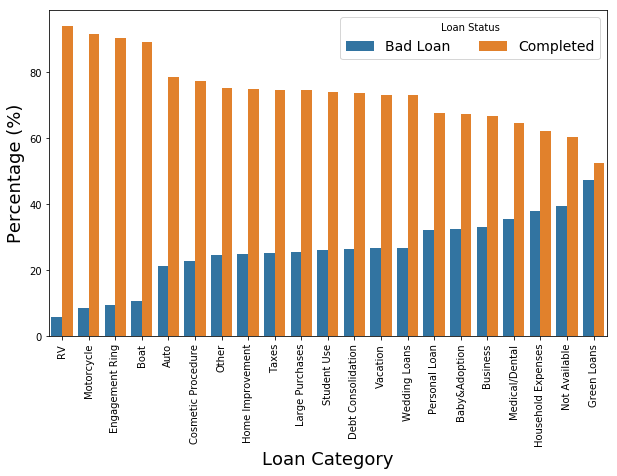

In [101]:
plt.figure(figsize=[10,6])
category_counts=(loan_df_status.groupby('ListingCategory')['Loan_Status_RC'].value_counts(normalize=True)
                 .rename('Percentage')
                 .mul(100)
                 .reset_index()
                 .sort_values('Percentage'))
sns.barplot(x='ListingCategory', y='Percentage', hue='Loan_Status_RC', data=category_counts)
plt.xticks(rotation=90)
plt.legend(title='Loan Status', fontsize=14, ncol=2)
plt.xlabel('Loan Category', fontsize=18)
plt.ylabel('Percentage (%)', fontsize=18);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Higher income people is likely to apply for higher loan amount. There are more applicants likely to  be bad loan with high income and large loan amount.

### Were there any interesting or surprising interactions between features?

> Although debt consolidation is most popular loan type. However, green loans seems having highest bad loan rate. 

<a id='Final Plots and Summary'></a>
## Final Plots and Summary

## Plot One

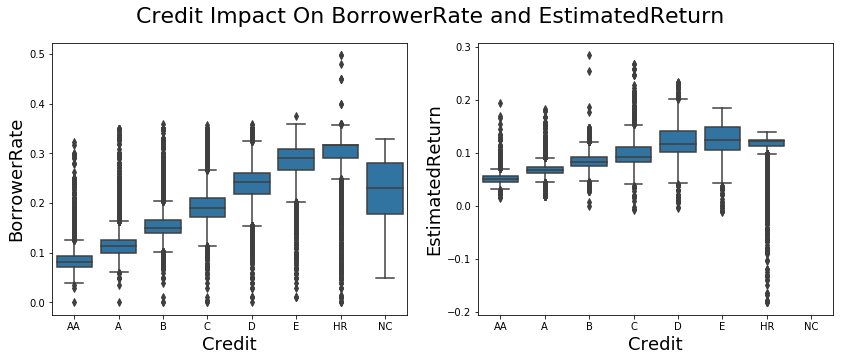

In [103]:


fig, ax = plt.subplots(ncols = 2, figsize = [14,5])

num_var=['BorrowerRate','EstimatedReturn']
for i in range(2):
    var=num_var[i]
   
    sns.boxplot(data=loan_df_copy, x='Credit', y=var, ax=ax[i], color=bc)
    ax[i].set_xlabel('Credit',fontsize=18)
    ax[i].set_ylabel(var, fontsize=18)

fig.suptitle('Credit Impact On BorrowerRate and EstimatedReturn', fontsize=22);


### Descritpion One

#### Among all variables, Credit has strongest impact on a borrower's interest rate. The better the Credit rating, the lower interst rate borrower will get. In contrast, a borrower with higher credit rating might indicate a worse return estimate. As loan company, Prosper is setting proper credit rating for borrowers. For investors at Prosper, they might want to balance risk and reward.

## Plot Two

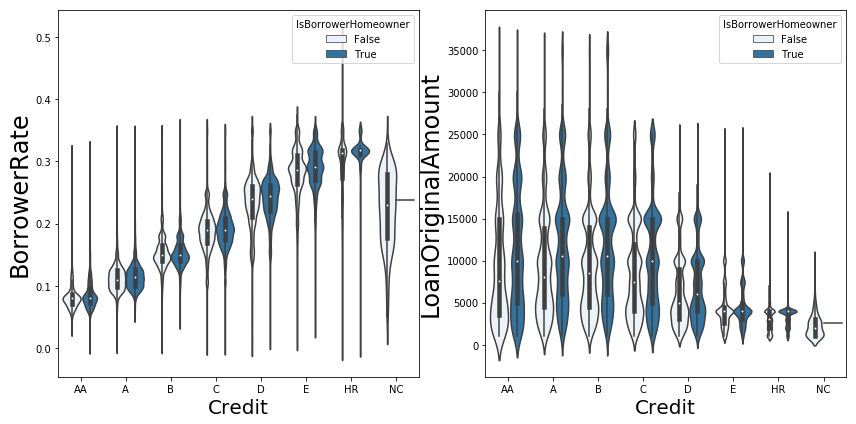

In [104]:
fig, ax=plt.subplots(ncols=2, figsize=[12,6])
columns2=['BorrowerRate','LoanOriginalAmount']
for i in range(2):
    var=columns2[i]
    sns.violinplot(data=loan_df_copy, x='Credit', y=var, hue='IsBorrowerHomeowner',ax=ax[i],color=bc)
    
    plt.tight_layout()
    ax[i].set_xlabel('Credit',fontsize=20)
    ax[i].set_ylabel(var,fontsize=24);

### Description Two

#### When applicant have higher credit rating than C , better grade, more homeowners tend to receive better interest rate. Once their credit rating is worse than C, more homeowners are likely getting higher interest rate.

#### When applicant has higher credit rating than C, homeowners are likely to have larger loan amount probably because they are also responsible for homeloan. Once their rating is lower than C, being a homeowner does not differentiate their loan amount. It is also interesting to note their loan amount is quite small than 5000 for bad rating applicant.


## Plot Three

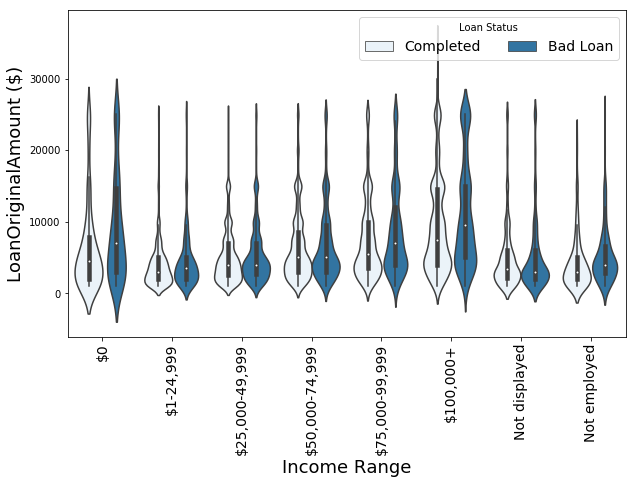

In [105]:
plt.figure(figsize=[10,6])
sns.violinplot(data=loan_df_status, x='IncomeRange', y='LoanOriginalAmount',hue='Loan_Status_RC',color=bc)
plt.xticks(rotation=90,fontsize=14)
plt.legend(title='Loan Status', fontsize=14, ncol=2)
plt.xlabel('Income Range', fontsize=18)
plt.ylabel('LoanOriginalAmount ($)', fontsize=18);


### Description Three

#### People with higher income (100,000+) are likely to have higher loans. However, they are more loans in this category becoming bad loans.

## Plot Four

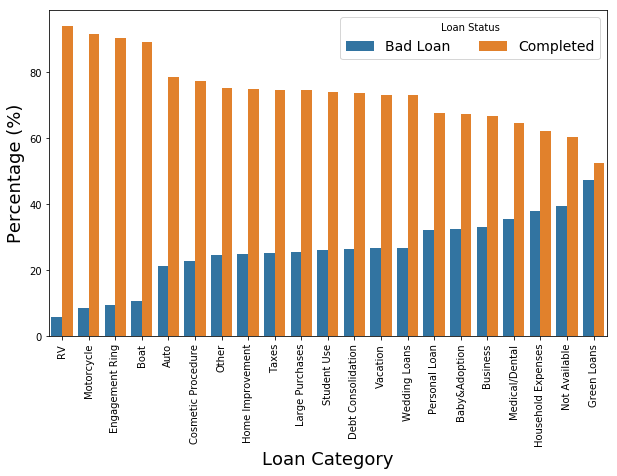

In [106]:
plt.figure(figsize=[10,6])
category_counts=(loan_df_status.groupby('ListingCategory')['Loan_Status_RC'].value_counts(normalize=True)
                 .rename('Percentage')
                 .mul(100)
                 .reset_index()
                 .sort_values('Percentage'))
sns.barplot(x='ListingCategory', y='Percentage', hue='Loan_Status_RC', data=category_counts)
plt.xticks(rotation=90)
plt.legend(title='Loan Status', fontsize=14, ncol=2)
plt.xlabel('Loan Category', fontsize=18)
plt.ylabel('Percentage (%)', fontsize=18);

### Description Four 

#### Although debt consolidation is most popular loan type. However, green loans seems having highest bad loan rate. 